<a href="https://colab.research.google.com/github/Ali-Fartout/Kaggle/blob/main/Tabular-Playground-Series-Mar-2022/TPS-March-2022-Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirement

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c tabular-playground-series-mar-2022

  0% 0.00/4.69M [00:00<?, ?B/s]
100% 4.69M/4.69M [00:00<00:00, 73.9MB/s]
  0% 0.00/25.2k [00:00<?, ?B/s]
100% 25.2k/25.2k [00:00<00:00, 33.3MB/s]
  0% 0.00/77.7k [00:00<?, ?B/s]
100% 77.7k/77.7k [00:00<00:00, 102MB/s]


In [2]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 46 kB/s 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/train.csv.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np
from math import sin, cos, pi
train = pd.read_csv('/content/train.csv',parse_dates=['time'])
test = pd.read_csv('/content/test.csv',parse_dates=['time'])
sub = pd.read_csv('/content/sample_submission.csv', index_col=0)

## Fucntions

In [5]:
def ExtractDates(data):
    data['weekday'] = data.time.dt.weekday
    data['hour'] = data.time.dt.hour
    data['minute'] = data.time.dt.minute
    return data

In [6]:
def EncodeDirections(data):

  numericalValues = {
      'NB': 0,
      'NE': 1,
      'EB': 2,
      'SE': 3,
      'SB': 4,
      'SW': 5,
      'WB': 6, 
      'NW': 7,
  }    

  sinValues= {
      'NB': 0.0,
      'NE': sin(1 * pi/4),
      'EB': 1.0,
      'SE': sin(3 * pi/4),
      'SB': 0.0,
      'SW': sin(5 * pi/4),    
      'WB': -1.0,    
      'NW': sin(7 * pi/4),  
  }
  
  cosValues = {
      'NB': 1.0,
      'NE': cos(1 * pi/4),
      'EB': 0.0,
      'SE': cos(3 * pi/4),
      'SB': -1.0,
      'SW': cos(5 * pi/4),    
      'WB': 0.0,    
      'NW': cos(7 * pi/4),  
  }


  data['sin'] = data['direction'].map(sinValues)
  data['cos'] = data['direction'].map(cosValues)
  data['direction'] = data['direction'].map(numericalValues)

  return data

# Frature Engineering

In [7]:
y = pd.DataFrame(train['congestion'],columns=['congestion'])
x = train.drop(columns=['congestion'])

In [8]:
for df in [train,test]:
  df = ExtractDates(df)
  df = EncodeDirections(df)

In [9]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=42)

# Model

## CatBoost

In [ ]:
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

catBoostModel = cb.CatBoostRegressor(loss_function= 'RMSE',
                             iterations = 200,
                             learning_rate=0.1, 
                             depth = 6)

catBoostModel.fit(xTrain,yTrain)
pred = catBoostModel.predict(xTest) 
rmse = (np.sqrt(mean_squared_error(yTest, pred)))
print('RMSE: {:.2f}'.format(rmse))

195:	learn: 9.6690268	total: 15.5s	remaining: 315ms
196:	learn: 9.6668216	total: 15.5s	remaining: 237ms
197:	learn: 9.6618500	total: 15.6s	remaining: 158ms
198:	learn: 9.6595860	total: 15.7s	remaining: 78.9ms
199:	learn: 9.6580513	total: 15.8s	remaining: 0us
RMSE: 9.67


In [ ]:
rmses = []
for learninnRate in np.arange (0.01,1,0.01):
  catBoostModel = cb.CatBoostRegressor(loss_function= 'RMSE',
                              iterations = 50,
                              learning_rate=learninnRate, 
                              depth = 6)

  catBoostModel.fit(xTrain,yTrain)
  pred = catBoostModel.predict(xTest) 
  rmse = (np.sqrt(mean_squared_error(yTest, pred)))
  rmses.append(rmse)


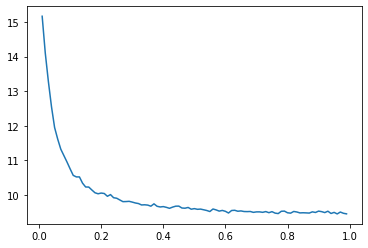

In [ ]:
import matplotlib.pyplot  as plt
plt.plot(np.arange (0.01,1,0.01),rmses)

In [ ]:
catBoostModel = cb.CatBoostRegressor(loss_function= 'RMSE',
                             iterations = 500,
                             learning_rate=1, 
                             depth = 6)

catBoostModel.fit(x,y)
pred = catBoostModel.predict(test) 


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 14.3897122	total: 114ms	remaining: 56.7s
1:	learn: 12.1408972	total: 237ms	remaining: 59.1s
2:	learn: 11.6779948	total: 349ms	remaining: 57.8s
3:	learn: 11.4241499	total: 480ms	remaining: 59.5s
4:	learn: 10.9671377	total: 601ms	remaining: 59.5s
5:	learn: 10.5611549	total: 717ms	remaining: 59s
6:	learn: 10.4025855	total: 827ms	remaining: 58.2s
7:	learn: 10.2661072	total: 942ms	remaining: 57.9s
8:	learn: 10.2014738	total: 1.07s	remaining: 58.6s
9:	learn: 10.1701736	total: 1.17s	remaining: 57.5s
10:	learn: 10.0986724	total: 1.29s	remaining: 57.4s
11:	learn: 10.0035398	total: 1.41s	remaining: 57.2s
12:	learn: 9.9838259	total: 1.53s	remaining: 57.3s
13:	learn: 9.9430667	total: 1.64s	remaining: 56.9s
14:	learn: 9.9296036	total: 1.75s	remaining: 56.6s
15:	learn: 9.8832213	total: 1.88s	remaining: 56.9s
16:	learn: 9.8748655	total: 1.97s	remaining: 56.1s
17:	learn: 9.8579911	total: 2.09s	remaining: 55.9s
18:	learn: 9.8330582	total: 2.2s	remaining: 55.7s
19:	learn: 9.8141500	total: 2.31

In [ ]:
# sub.congestion = pred
# sub.to_csv('Catboost.csv')

Loss = 6.10

## Lightgbm

In [ ]:
xTrain

,row_id,time,x,y,direction,weekday,hour,minute,sin,cos
807741,807741,1991-09-21 13:20:00,2,2,2,5,13,20,1.000000,0.000000
758873,758873,1991-09-10 18:20:00,2,3,5,1,18,20,-0.707107,-0.707107
297262,297262,1991-06-03 17:40:00,1,0,2,0,17,40,1.000000,0.000000
313964,313964,1991-06-07 07:20:00,0,3,4,4,7,20,0.000000,-1.000000
761510,761510,1991-09-11 08:00:00,1,3,1,2,8,0,0.707107,0.707107
...,...,...,...,...,...,...,...,...,...,...
259178,259178,1991-05-26 14:00:00,1,1,2,6,14,0,1.000000,0.000000
365838,365838,1991-06-18 10:40:00,1,0,0,1,10,40,0.000000,1.000000
131932,131932,1991-04-29 07:00:00,2,1,4,0,7,0,0.000000,-1.000000
671155,671155,1991-08-22 19:20:00,1,2,4,3,19,20,0.000000,-1.000000


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
rmses = []
for learninnRate in np.arange (0.01,1,0.01):
  LGBMModel = LGBMRegressor(n_estimators  = 100,
                              learning_rate=learninnRate, 
                              max_depth  = 6)

  LGBMModel.fit(xTrain.drop(columns='time'),yTrain)
  pred = LGBMModel.predict(xTest.drop(columns='time')) 
  rmse = (np.sqrt(mean_squared_error(yTest, pred)))
  rmses.append(rmse)


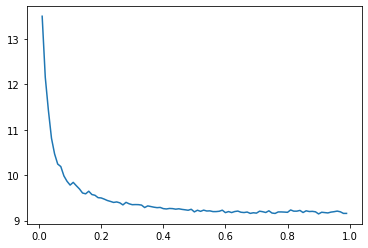

In [ ]:
plt.plot(np.arange (0.01,1,0.01),rmses)

In [ ]:
LGBMModel = LGBMRegressor(n_estimators  = 100,
                              learning_rate=1, 
                              max_depth  = 6)

LGBMModel.fit(x.drop(columns='time'),y)
pred = LGBMModel.predict(test.drop(columns='time')) 

In [ ]:
# sub.congestion = pred
# sub.to_csv('LGBM.csv')

Loss = 6.013

## XGboost

In [ ]:
from xgboost import  XGBRegressor

In [ ]:
rmses = []
for learninnRate in np.arange(0.01,1.5,0.1):
  XGBModel = XGBRegressor(n_estimators  = 100,
                                learning_rate=learninnRate, 
                                max_depth  = 6)
  XGBModel.fit(xTrain.drop(columns='time'),yTrain)
  pred = XGBModel.predict(xTest.drop(columns='time')) 
  rmse = (np.sqrt(mean_squared_error(yTest, pred)))
  rmses.append(rmse)

[14:15:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:16:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:19:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:22:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

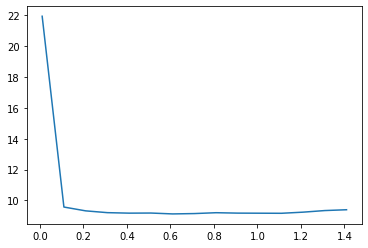

In [ ]:
plt.plot(np.arange(0.01,1.5,0.1),rmses)

In [ ]:
  XGBModel = XGBRegressor(n_estimators  = 100,
                                learning_rate= 0.5, 
                                max_depth  = 6)
  XGBModel.fit(x.drop(columns='time'),y)
  pred = XGBModel.predict(test.drop(columns='time')) 

[14:35:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
sub.congestion = pred
sub.to_csv('XGBoost.csv')

Loss: 6.01

## Random Forest

In [38]:
import pandas as pd
import numpy as np
from math import sin, cos, pi
train = pd.read_csv('/content/train.csv',parse_dates=['time'])
test = pd.read_csv('/content/test.csv',parse_dates=['time'])
sub = pd.read_csv('/content/sample_submission.csv', index_col=0)

In [39]:
def DirectionConcat(data):
 return  data.apply(lambda row: f"{row.x}-{row.y}-{row.direction}", axis=1).values.reshape([-1, 1])

trainCopy = train.copy()
testCopy = test.copy()
for df in [trainCopy, testCopy]:
    df['Dir_Pos'] = DirectionConcat(df)

In [41]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)
ohe.fit(trainCopy[['Dir_Pos']])

def engineer(df):
    """Return a new dataframe with the engineered features"""
    
    new_df = pd.DataFrame(ohe.transform(df[['Dir_Pos']]),
                          columns=ohe.categories_[0][1:],
                          index=df.index)
    new_df['saturday'] = df.time.dt.weekday == 5
    new_df['sunday'] = df.time.dt.weekday == 6
    new_df['daytime'] = df.time.dt.hour * 60 + df.time.dt.minute
    new_df['dayofyear'] = df.time.dt.dayofyear # to model the trend
    return new_df


train = engineer(trainCopy)
test = engineer(testCopy)

train['congestion'] = trainCopy.congestion

features = list(test.columns)
print(list(features))

['0-0-NB', '0-0-SB', '0-1-EB', '0-1-NB', '0-1-SB', '0-1-WB', '0-2-EB', '0-2-NB', '0-2-SB', '0-2-WB', '0-3-EB', '0-3-NB', '0-3-NE', '0-3-SB', '0-3-SW', '0-3-WB', '1-0-EB', '1-0-NB', '1-0-NE', '1-0-SB', '1-0-SW', '1-0-WB', '1-1-EB', '1-1-NB', '1-1-SB', '1-1-WB', '1-2-EB', '1-2-NB', '1-2-NE', '1-2-SB', '1-2-SW', '1-2-WB', '1-3-EB', '1-3-NB', '1-3-NE', '1-3-SB', '1-3-SW', '1-3-WB', '2-0-EB', '2-0-NB', '2-0-SB', '2-0-WB', '2-1-EB', '2-1-NB', '2-1-NE', '2-1-NW', '2-1-SB', '2-1-SE', '2-1-SW', '2-1-WB', '2-2-EB', '2-2-NB', '2-2-NE', '2-2-NW', '2-2-SB', '2-2-SE', '2-2-SW', '2-2-WB', '2-3-EB', '2-3-NB', '2-3-NE', '2-3-SB', '2-3-SW', '2-3-WB', 'saturday', 'sunday', 'daytime', 'dayofyear']


In [ ]:

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import ExtraTreesRegressor
# Split into train and test
# Use all Monday-Wednesday afternoons in August and September for validation
val_idx = ((trainCopy.time.dt.month >= 8) & 
           (trainCopy.time.dt.weekday <= 3) &
           (trainCopy.time.dt.hour >= 12)).values
train_idx = ~val_idx

X_tr, X_va = train.loc[train_idx, features], train.loc[val_idx, features]
y_tr, y_va = train.loc[train_idx, 'congestion'], train.loc[val_idx, 'congestion']

# Train and validate the regressor
#pipe = make_pipeline(StandardScaler(), HuberRegressor(epsilon=1.001, alpha=100))
# pipe = RandomForestRegressor(n_estimators=0, max_samples=0.03,
#                             n_jobs=-1, random_state=1)
pipe = ExtraTreesRegressor(n_estimators=0,
                           #bootstrap=True, max_samples=0.20,
                           min_samples_split=101,
                           n_jobs=-1, random_state=1)
estimators_list, mae_list = [], []
n_estimators = 4
initialized = False
while n_estimators < 256:
    n_estimators *= 4
    pipe.set_params(n_estimators=n_estimators,
                    warm_start=initialized)
    pipe.fit(X_tr, y_tr)
    initialized = True

    # Compute the (intermediate) validation score
    y_va_pred = pipe.predict(X_va)
    
    estimators_list.append(pipe.get_params()['n_estimators'])
    mae_list.append(mean_absolute_error(y_va, y_va_pred))
    print(f"{estimators_list[-1]:4} estimators:   "
          f"Validation MAE = {mae_list[-1]:.5f}")

Loss : 5.7